In [ ]:
!unzip /content/ts_files.zip -d ts_files

In [222]:
import pandas as pd

df = pd.read_csv('/content/ts_files/ts_files/als5.ts', delimiter='\t', header=None)


print(df.to_string())


           0       1       2       3       4      5      6       7       8      9      10      11      12
0     21.9533  1.3133  1.2600  0.5000  0.4067  38.07  32.28  0.8133  0.8533  61.93  67.72  0.4067   30.96
1     23.1967  1.2433  1.2733  0.4533  0.4167  36.46  32.72  0.7900  0.8567  63.54  67.28  0.3733   30.03
2     24.4200  1.2233  1.2667  0.4400  0.4233  35.97  33.42  0.7833  0.8433  64.03  66.58  0.3600   29.43
3     25.6700  1.2500  1.2267  0.5000  0.4100  40.00  33.42  0.7500  0.8167  60.00  66.58  0.3400   27.20
4     26.9433  1.2733  1.2700  0.4533  0.4300  35.60  33.86  0.8200  0.8400  64.40  66.14  0.3900   30.63
5     28.3367  1.3933  1.2967  0.5133  0.4433  36.84  34.19  0.8800  0.8533  63.16  65.81  0.4367   31.34
6     29.6767  1.3400  1.2967  0.5700  0.3567  42.54  27.51  0.7700  0.9400  57.46  72.49  0.4133   30.85
7     31.1300  1.4533  1.4300  0.5600  0.4267  38.53  29.84  0.8933  1.0033  61.47  70.16  0.4667   32.11
8     32.5867  1.4567  1.5733  0.4600  0.5500 

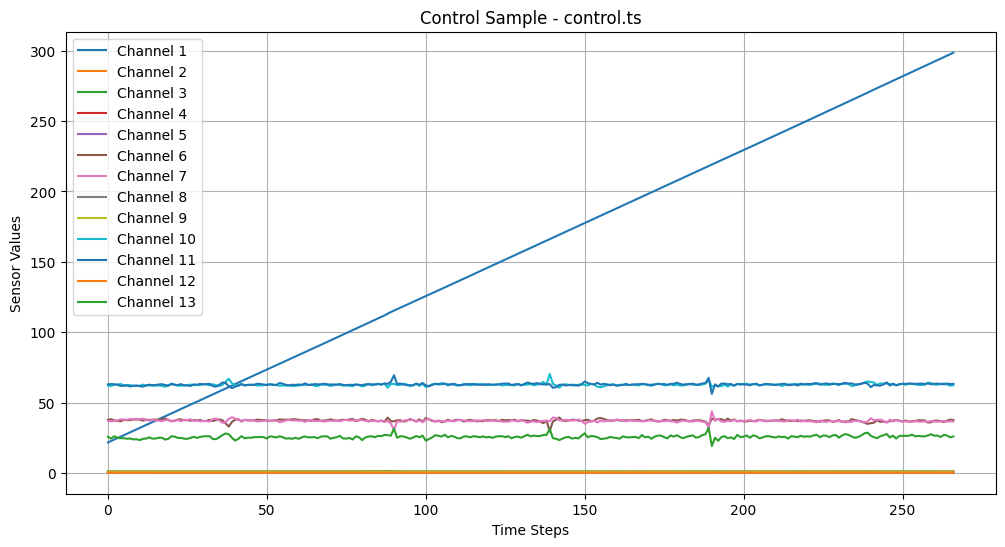

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one signal
df = pd.read_csv('/content/ts_files/ts_files/control4.ts', delimiter='\t', header=None)

# Plot all sensor channels
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'Channel {col+1}')
plt.title('Control Sample - control.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.show()


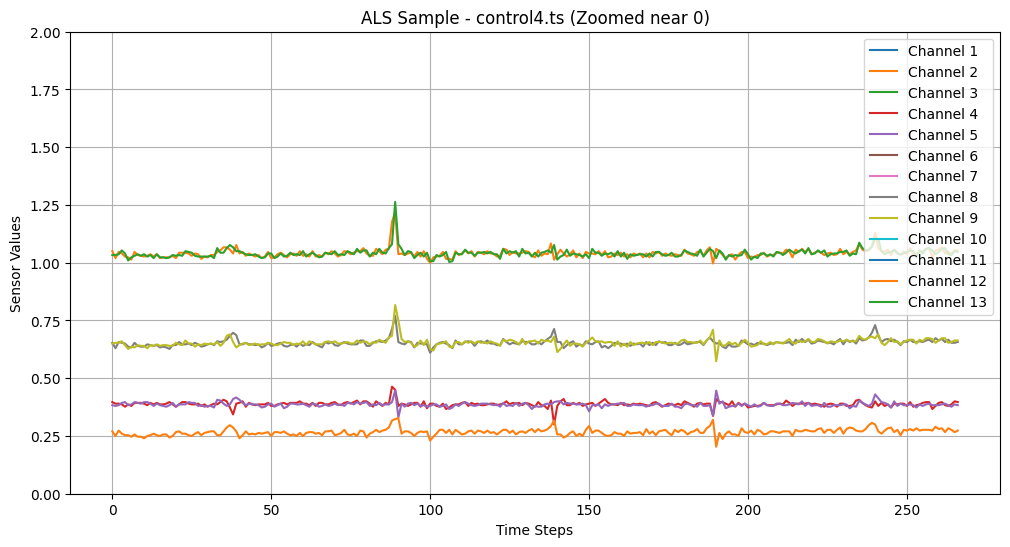

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ts_files/ts_files/control4.ts', delimiter='\t', header=None)

plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'Channel {col+1}')

plt.title('ALS Sample - control4.ts (Zoomed near 0)')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


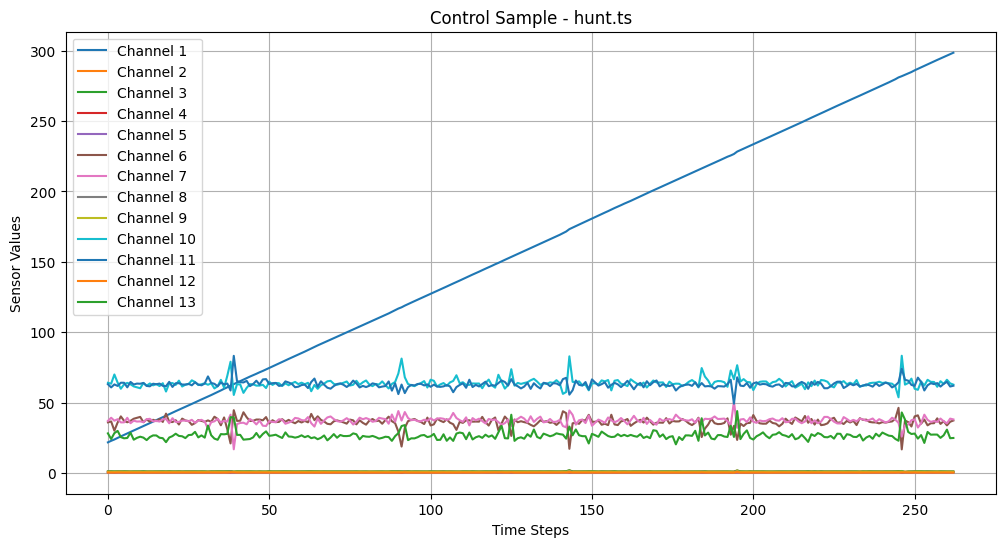

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one signal
df = pd.read_csv('/content/ts_files/ts_files/hunt6.ts', delimiter='\t', header=None)

# Plot all sensor channels
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'Channel {col+1}')
plt.title('Control Sample - hunt.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.show()


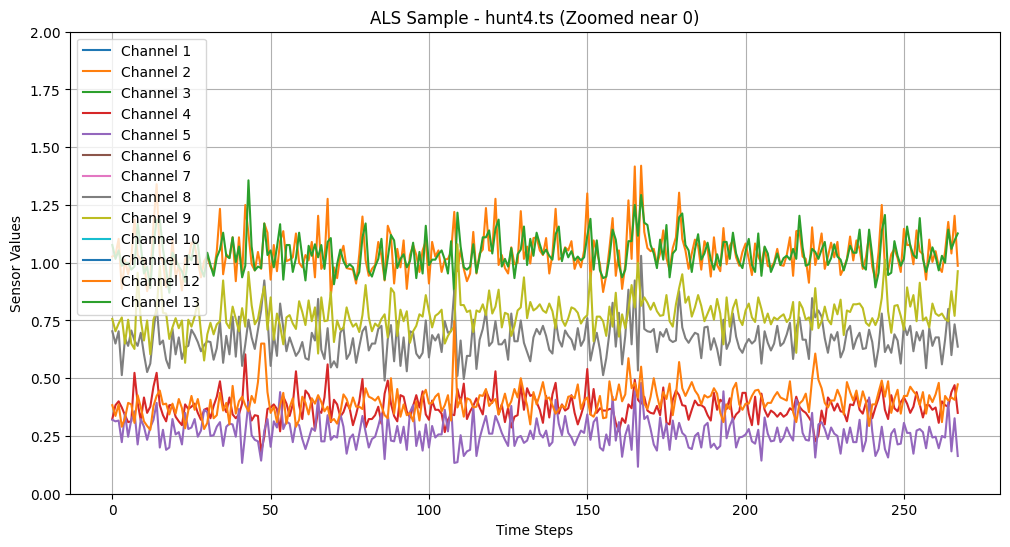

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ts_files/ts_files/hunt4.ts', delimiter='\t', header=None)

plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'Channel {col+1}')

plt.title('ALS Sample - hunt4.ts (Zoomed near 0)')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


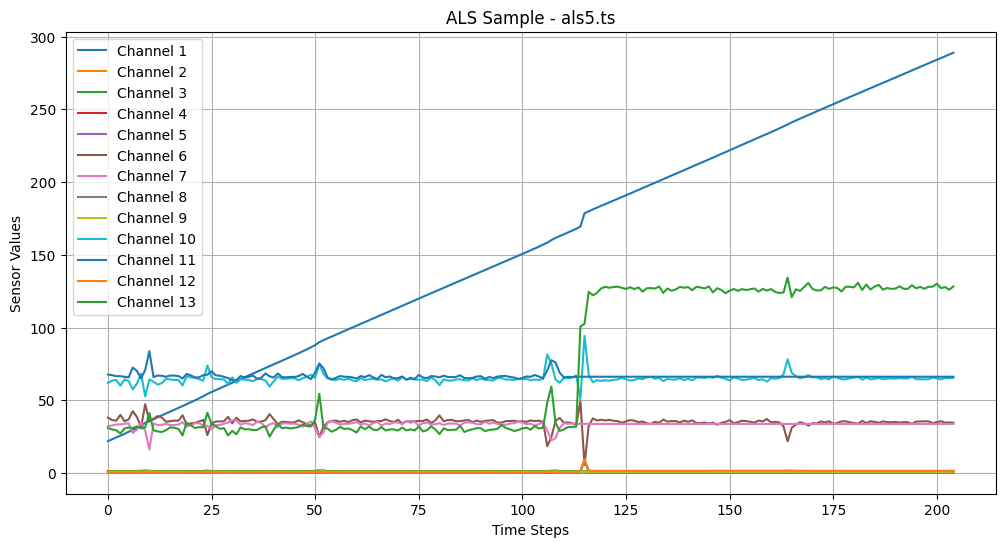

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one signal
df = pd.read_csv('/content/ts_files/ts_files/als5.ts', delimiter='\t', header=None)

# Plot all sensor channels
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'Channel {col+1}')
plt.title('ALS Sample - als5.ts')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.show()


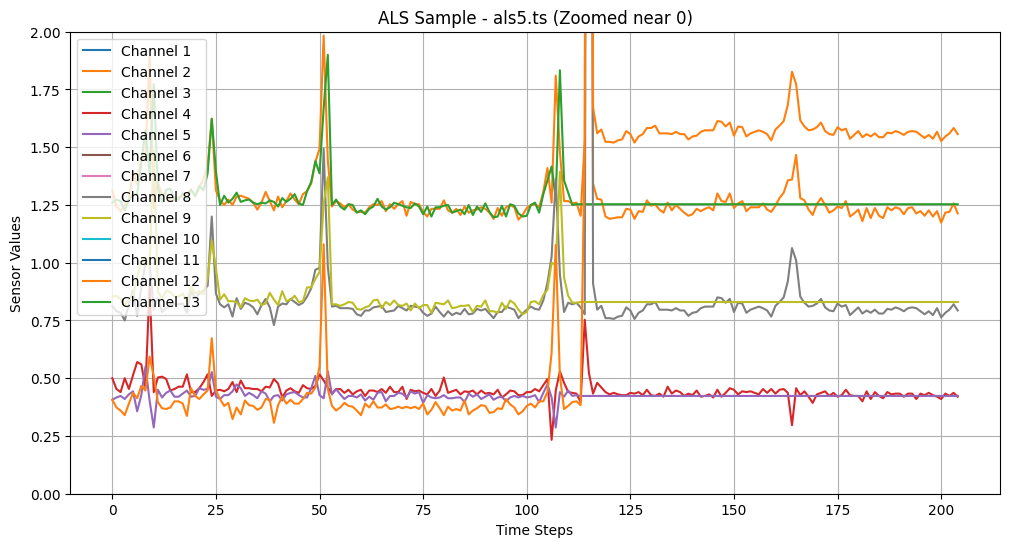

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ts_files/ts_files/als5.ts', delimiter='\t', header=None)

plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=f'Channel {col+1}')

plt.title('ALS Sample - als5.ts (Zoomed near 0)')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


In [146]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

data_folder = '/content/ts_files/ts_files'

diseases = {
    'als': 'ALS',
    'park': 'Parkinsons',
    'control': 'Control',
    'hunt': 'Huntingtons'
}

columns = [
    "Time", "Left_Stride", "Right_Stride", "Left_Swing", "Right_Swing",
    "Left_Swing_%", "Right_Swing_%", "Left_Stance", "Right_Stance",
    "Left_Stance_%", "Right_Stance_%", "Double_Support", "Double_Support_%"
]

all_data = []

ts_files = glob(os.path.join(data_folder, "*.ts"))

for file in ts_files:
    file_name = os.path.basename(file).lower()
    for key, disease_name in diseases.items():
        if key in file_name:
            df = pd.read_csv(file, sep="\t", header=None, names=columns)
            df['Subject'] = file_name.split('.')[0]
            df['Disease'] = disease_name
            all_data.append(df)
            break


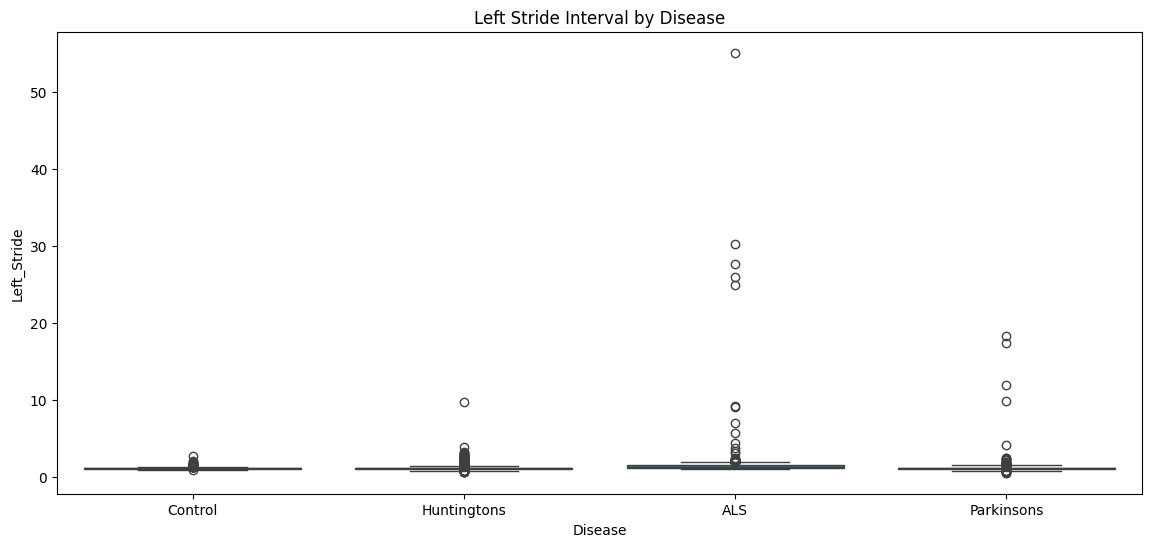

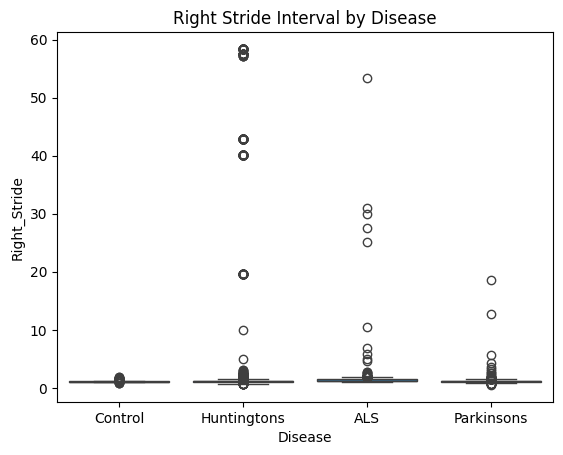

In [147]:
plt.figure(figsize=(14, 6))
import seaborn as sns
import pandas as pd

data = pd.concat(all_data, ignore_index=True)

sns.boxplot(data=data, x='Disease', y='Left_Stride')
plt.title('Left Stride Interval by Disease')
plt.show()

sns.boxplot(data=data, x='Disease', y='Right_Stride')
plt.title('Right Stride Interval by Disease')
plt.show()

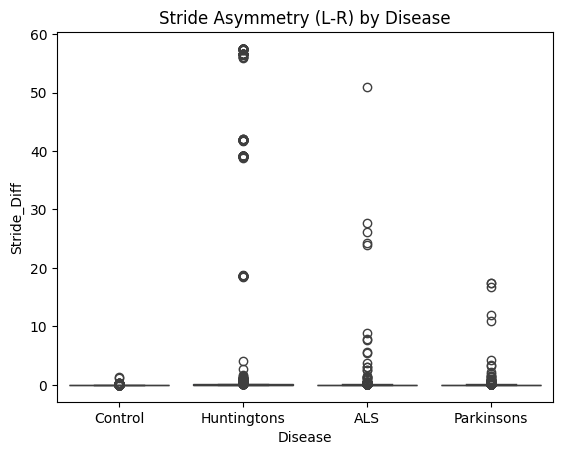

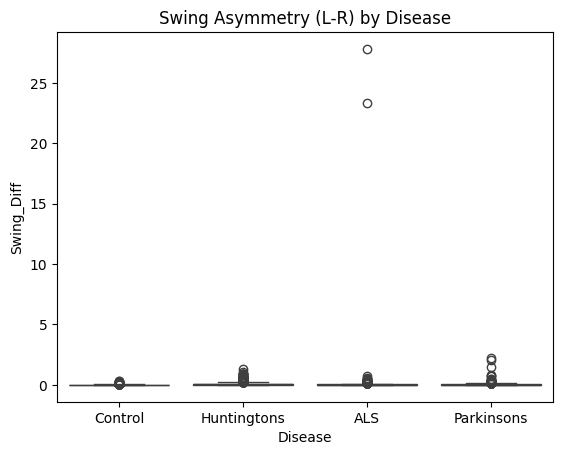

In [148]:
data['Stride_Diff'] = abs(data['Left_Stride'] - data['Right_Stride'])
data['Swing_Diff'] = abs(data['Left_Swing'] - data['Right_Swing'])

sns.boxplot(data=data, x='Disease', y='Stride_Diff')
plt.title('Stride Asymmetry (L-R) by Disease')
plt.show()

sns.boxplot(data=data, x='Disease', y='Swing_Diff')
plt.title('Swing Asymmetry (L-R) by Disease')
plt.show()


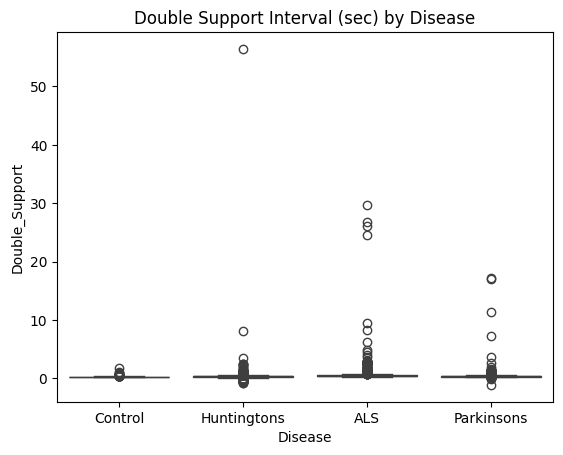

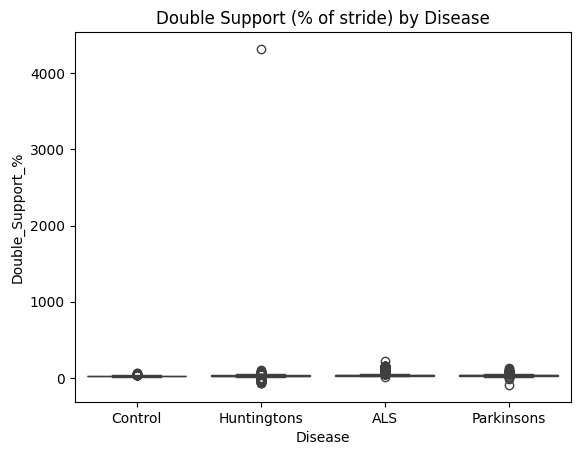

In [149]:
sns.boxplot(data=data, x='Disease', y='Double_Support')
plt.title('Double Support Interval (sec) by Disease')
plt.show()

sns.boxplot(data=data, x='Disease', y='Double_Support_%')
plt.title('Double Support (% of stride) by Disease')
plt.show()


In [150]:
print(type(all_data))
print(len(all_data))
print(all_data[0].head())


<class 'list'>
64
      Time  Left_Stride  Right_Stride  Left_Swing  Right_Swing  Left_Swing_%  \
0  22.5000       1.0300        1.0300      0.3833       0.3200         37.22   
1  23.5300       1.0300        1.0133      0.4033       0.3133         39.16   
2  24.5833       1.0533        1.0533      0.4000       0.3167         37.97   
3  25.6300       1.0467        1.0600      0.3833       0.3367         36.62   
4  26.6767       1.0467        1.0433      0.3767       0.3167         35.99   

   Right_Swing_%  Left_Stance  Right_Stance  Left_Stance_%  Right_Stance_%  \
0          31.07       0.6467        0.7100          62.78           68.93   
1          30.92       0.6267        0.7000          60.84           69.08   
2          30.06       0.6533        0.7367          62.03           69.94   
3          31.76       0.6633        0.7233          63.38           68.24   
4          30.35       0.6700        0.7267          64.01           69.65   

   Double_Support  Double_Suppor

In [151]:
import os
import pandas as pd
from glob import glob

data_folder = '/content/ts_files/ts_files'

disease_map = {
    'als': 'ALS',
    'park': 'Parkinsons',
    'control': 'Control',
    'hunt': 'Huntingtons'
}

columns = [
    "Time", "Left_Stride", "Right_Stride", "Left_Swing", "Right_Swing",
    "Left_Swing_%", "Right_Swing_%", "Left_Stance", "Right_Stance",
    "Left_Stance_%", "Right_Stance_%", "Double_Support", "Double_Support_%"
]

all_data = []

files = glob(os.path.join(data_folder, "*.ts"))
for file_path in files:
    filename = os.path.basename(file_path).lower()
    for key, disease_name in disease_map.items():
        if key in filename:
            df = pd.read_csv(file_path, sep='\t', header=None, names=columns)
            df['Subject'] = filename.split('.')[0]
            df['Disease'] = disease_name
            all_data.append(df)
            break

data = pd.concat(all_data, ignore_index=True)

print("Diseases found:", data['Disease'].unique())
print(data['Disease'].value_counts())


Diseases found: ['Control' 'Huntingtons' 'ALS' 'Parkinsons']
Disease
Huntingtons    4846
Control        4076
Parkinsons     3688
ALS            2550
Name: count, dtype: int64


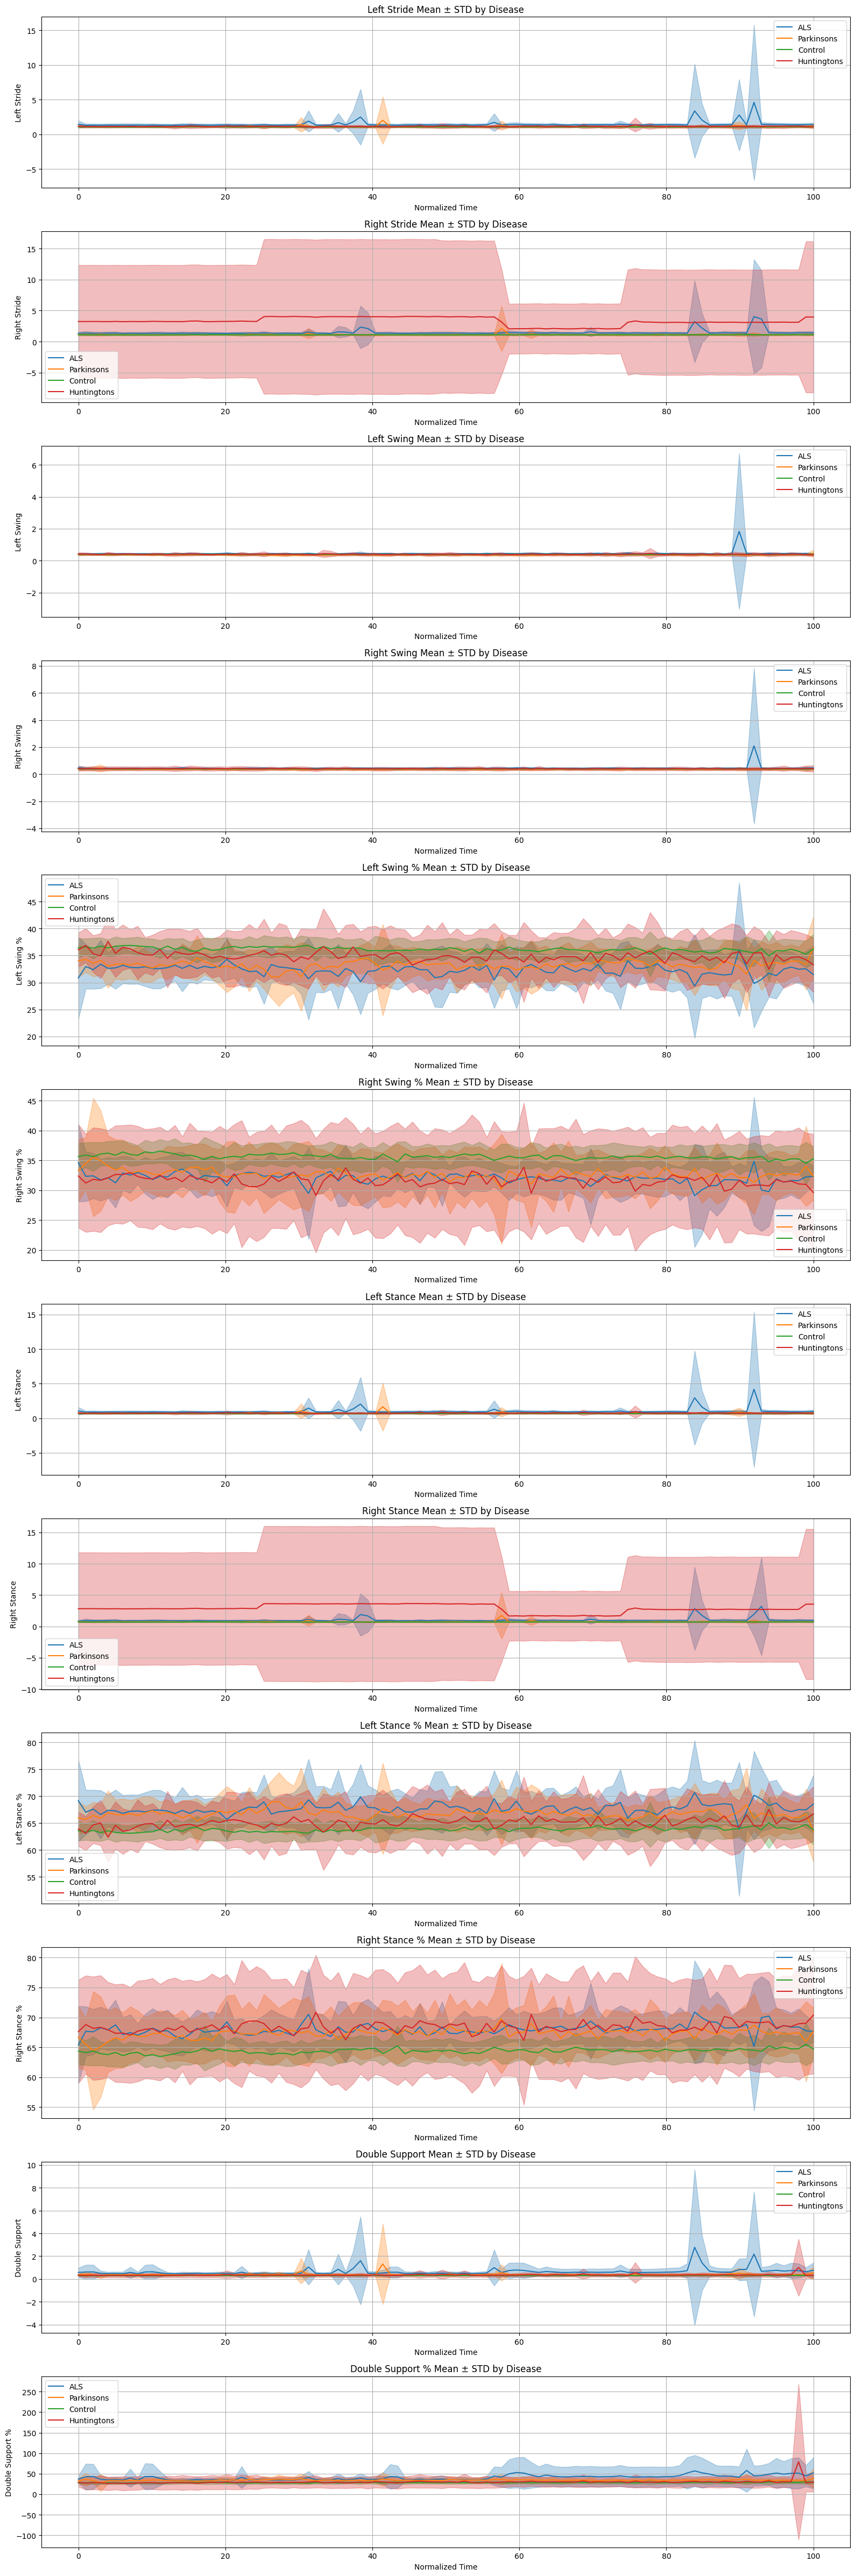

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = [
    "Left_Stride", "Right_Stride",
    "Left_Swing", "Right_Swing",
    "Left_Swing_%", "Right_Swing_%",
    "Left_Stance", "Right_Stance",
    "Left_Stance_%", "Right_Stance_%",
    "Double_Support", "Double_Support_%"
]

diseases = ['ALS','Parkinsons', 'Control', 'Huntingtons']
colors = sns.color_palette("tab10", n_colors=len(diseases))

plt.figure(figsize=(16, 4 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)

    for j, disease in enumerate(diseases):
        df_disease = data[data['Disease'] == disease]

        subjects = df_disease['Subject'].unique()
        subj_means = []

        for subject in subjects:
            df_sub = df_disease[df_disease['Subject'] == subject]
            values = df_sub[feature].values
            if len(values) == 0:
                continue
            x_orig = np.linspace(0, 1, len(values))
            x_new = np.linspace(0, 1, 100)
            interp_vals = np.interp(x_new, x_orig, values)
            subj_means.append(interp_vals)

        if len(subj_means) == 0:
            continue

        subj_means = np.array(subj_means)
        mean_curve = subj_means.mean(axis=0)
        std_curve = subj_means.std(axis=0)

        x_plot = np.linspace(0, 100, 100)
        plt.plot(x_plot, mean_curve, label=disease, color=colors[j])
        plt.fill_between(x_plot, mean_curve - std_curve, mean_curve + std_curve,
                         color=colors[j], alpha=0.3)

    plt.title(f'{feature.replace("_", " ")} Mean ± STD by Disease')
    plt.xlabel('Normalized Time')
    plt.ylabel(feature.replace("_", " "))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [153]:
print(data['Disease'].unique())
print(data['Disease'].value_counts())


['Control' 'Huntingtons' 'ALS' 'Parkinsons']
Disease
Huntingtons    4846
Control        4076
Parkinsons     3688
ALS            2550
Name: count, dtype: int64


In [ ]:
import pandas as pd

subject_metadata = pd.read_csv("subject-description.txt", sep="\t")

subject_metadata.columns = [col.strip().replace(" ", "_").replace("(", "").replace(")", "") for col in subject_metadata.columns]

print(subject_metadata.head())


  Unnamed:_0    GROUP  AGEYRS  HEIGHTmeters Weightkg gender GaitSpeedm/sec  \
0   control1  control    57.0          1.94       95      f           1.33   
1   control2  control    22.0          1.94       70      m           1.47   
2   control3  control    23.0          1.83       66      f           1.44   
3   control4  control    52.0          1.78       73      f           1.54   
4   control5  control    47.0          1.94       82      f           1.54   

   Duration/Severity  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [214]:
import os
import pandas as pd
import numpy as np

subject_info = pd.read_csv('/content/subject-description.txt', sep='\t')
subject_info['GROUP'] = subject_info['GROUP'].str.lower()

all_data = []

for file in os.listdir('/content/ts_files/ts_files'):
    if file.endswith('.ts'):
        subject_id = file.replace('.ts', '').lower()
        print(f"Reading: {file} --> ID: {subject_id}")

        prefix = ''.join([char for char in subject_id if char.isalpha()])

        subject_row = subject_info[subject_info['GROUP'] == prefix]
        if subject_row.empty:
            print(f"No metadata found for group: {prefix}")
            continue

        subject_meta = subject_row.iloc[0].to_dict()

        df = pd.read_csv(f'/content/ts_files/ts_files/{file}', sep='\t', header=None)
        df.columns = [
            'Elapsed Time', 'Left Stride', 'Right Stride',
            'Left Swing', 'Right Swing', 'Left Swing %', 'Right Swing %',
            'Left Stance', 'Right Stance', 'Left Stance %', 'Right Stance %',
            'Double Support', 'Double Support %'
        ]

        df['Stride Asym'] = np.abs(df['Left Stride'] - df['Right Stride']) / ((df['Left Stride'] + df['Right Stride']) / 2)
        df['Swing Asym'] = np.abs(df['Left Swing'] - df['Right Swing']) / ((df['Left Swing'] + df['Right Swing']) / 2)
        df['Stance Asym'] = np.abs(df['Left Stance'] - df['Right Stance']) / ((df['Left Stance'] + df['Right Stance']) / 2)

        for key, value in subject_meta.items():
            df[key] = value
        df['SubjectID'] = subject_id

        all_data.append(df)

if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv('combined_gait_data.csv', index=False)
    print("Combined data shape:", combined_df.shape)
    print("Saved to: combined_gait_data.csv")
else:
    print("No data was combined. Check if metadata is matched correctly.")


Reading: control6.ts --> ID: control6
Reading: hunt12.ts --> ID: hunt12
Reading: als7.ts --> ID: als7
Reading: hunt10.ts --> ID: hunt10
Reading: als4.ts --> ID: als4
Reading: park7.ts --> ID: park7
Reading: hunt6.ts --> ID: hunt6
Reading: park13.ts --> ID: park13
Reading: als8.ts --> ID: als8
Reading: hunt17.ts --> ID: hunt17
Reading: control8.ts --> ID: control8
Reading: park2.ts --> ID: park2
Reading: control11.ts --> ID: control11
Reading: hunt3.ts --> ID: hunt3
Reading: control16.ts --> ID: control16
Reading: control1.ts --> ID: control1
Reading: park14.ts --> ID: park14
Reading: park11.ts --> ID: park11
Reading: hunt1.ts --> ID: hunt1
Reading: als2.ts --> ID: als2
Reading: control13.ts --> ID: control13
Reading: hunt19.ts --> ID: hunt19
Reading: als11.ts --> ID: als11
Reading: hunt8.ts --> ID: hunt8
Reading: hunt16.ts --> ID: hunt16
Reading: control9.ts --> ID: control9
Reading: hunt11.ts --> ID: hunt11
Reading: control15.ts --> ID: control15
Reading: als9.ts --> ID: als9
Reading:

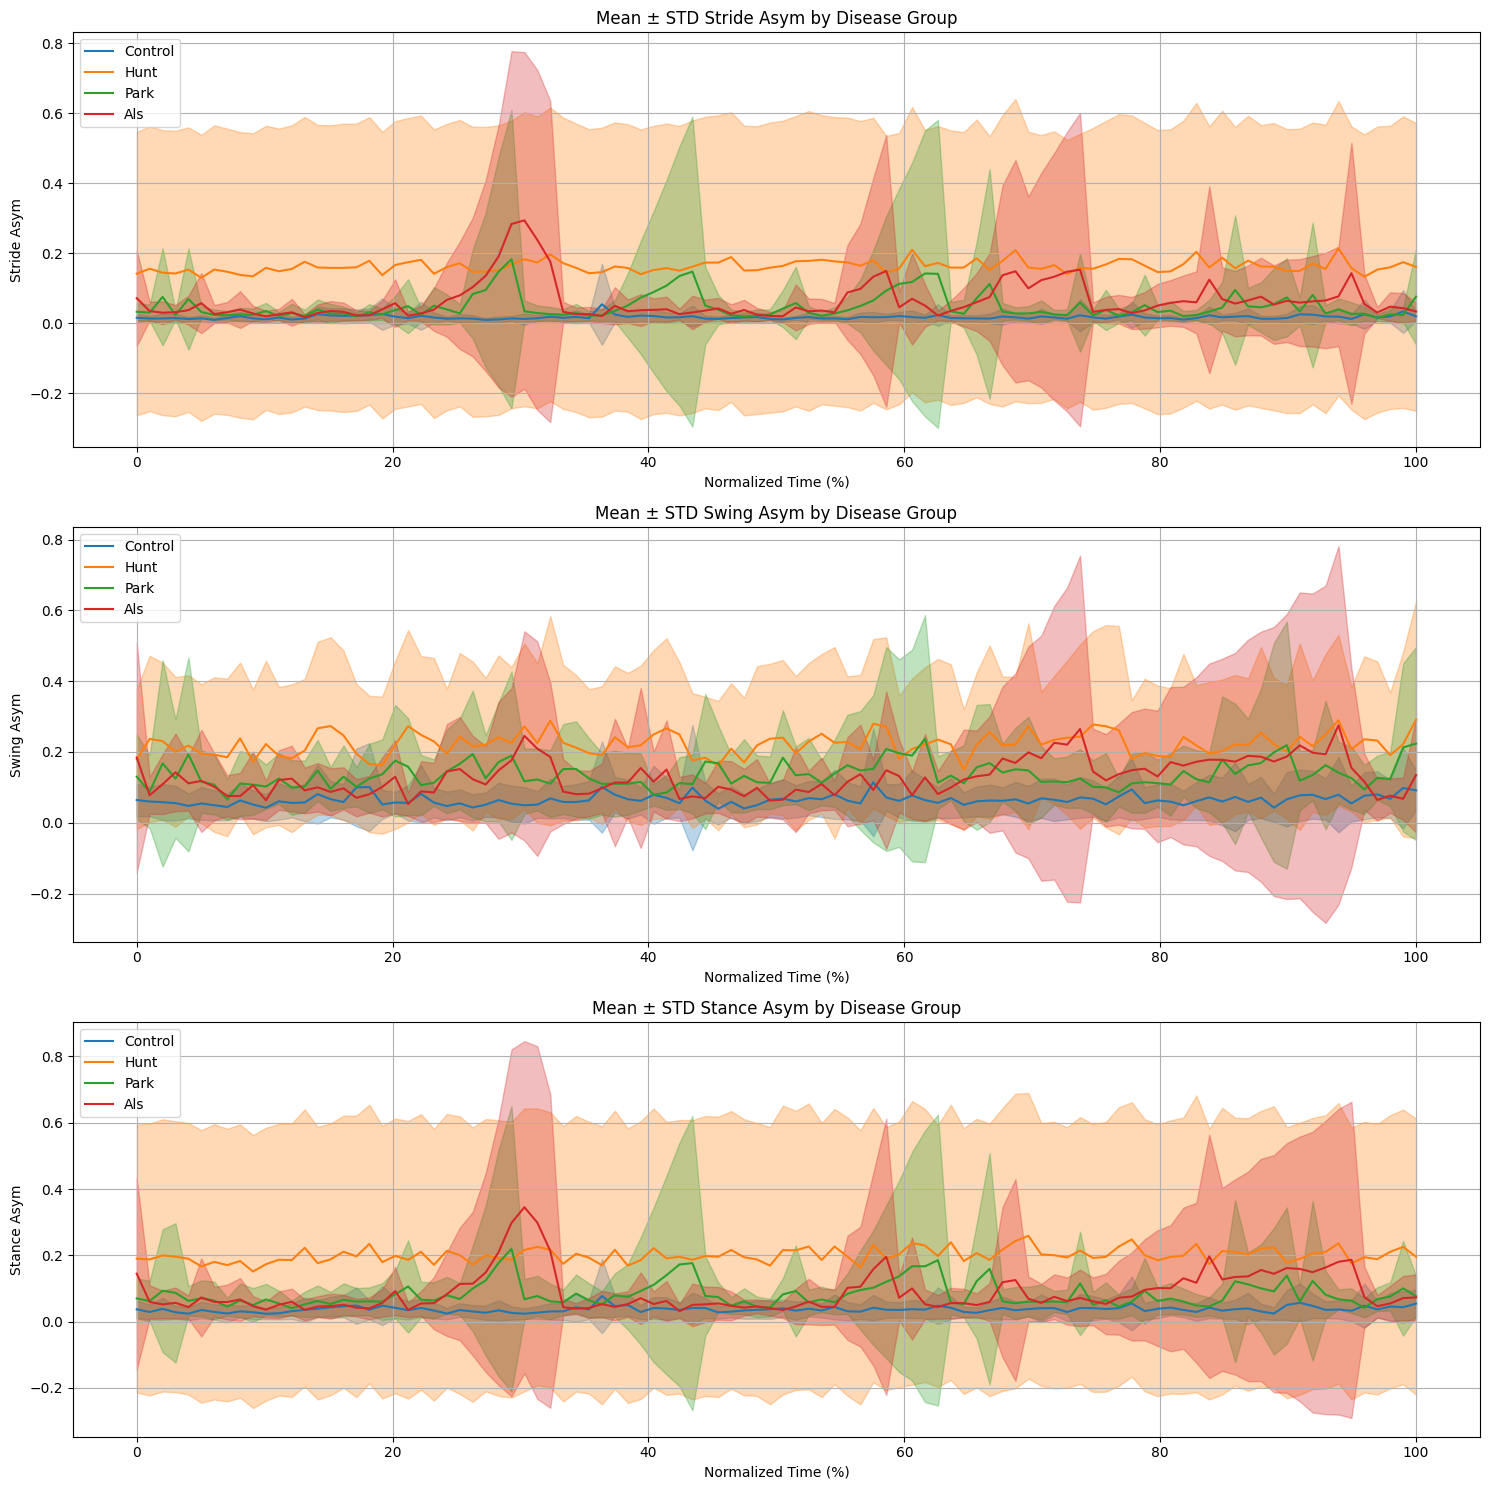

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['Stride Asym', 'Swing Asym', 'Stance Asym']
groups = ['control', 'hunt','park','als']
colors = sns.color_palette("tab10", n_colors=len(groups))

plt.figure(figsize=(15, 5 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)

    for j, group in enumerate(groups):
        subset = combined_df[combined_df['GROUP'] == group]

        subjects = subset['SubjectID'].unique()
        subject_curves = []

        for subject in subjects:
            sub_data = subset[subset['SubjectID'] == subject]

            x_orig = sub_data['Elapsed Time'].values
            y_orig = sub_data[feature].values

            if len(x_orig) == 0:
                continue

            x_norm = (x_orig - x_orig.min()) / (x_orig.max() - x_orig.min())

            x_new = np.linspace(0, 1, 100)
            y_interp = np.interp(x_new, x_norm, y_orig)
            subject_curves.append(y_interp)

        if len(subject_curves) == 0:
            continue

        subject_curves = np.array(subject_curves)
        mean_curve = subject_curves.mean(axis=0)
        std_curve = subject_curves.std(axis=0)

        plt.plot(x_new * 100, mean_curve, label=group.capitalize(), color=colors[j])
        plt.fill_between(x_new * 100, mean_curve - std_curve, mean_curve + std_curve, color=colors[j], alpha=0.3)

    plt.title(f'Mean ± STD {feature} by Disease Group')
    plt.xlabel('Normalized Time (%)')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [162]:
df = pd.read_csv('combined_gait_data.csv')
df.head()


,Elapsed Time,Left Stride,Right Stride,Left Swing,Right Swing,Left Swing %,Right Swing %,Left Stance,Right Stance,Left Stance %,...,Stance Asym,Unnamed: 0,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,SubjectID
0,22.5000,1.0300,1.0300,0.3833,0.3200,37.22,31.07,0.6467,0.7100,62.78,...,0.093315,control1,control,57.0,1.94,95.0,f,1.33,0.0,control6
1,23.5300,1.0300,1.0133,0.4033,0.3133,39.16,30.92,0.6267,0.7000,60.84,...,0.110500,control1,control,57.0,1.94,95.0,f,1.33,0.0,control6
2,24.5833,1.0533,1.0533,0.4000,0.3167,37.97,30.06,0.6533,0.7367,62.03,...,0.120000,control1,control,57.0,1.94,95.0,f,1.33,0.0,control6
3,25.6300,1.0467,1.0600,0.3833,0.3367,36.62,31.76,0.6633,0.7233,63.38,...,0.086543,control1,control,57.0,1.94,95.0,f,1.33,0.0,control6
4,26.6767,1.0467,1.0433,0.3767,0.3167,35.99,30.35,0.6700,0.7267,64.01,...,0.081191,control1,control,57.0,1.94,95.0,f,1.33,0.0,control6


In [163]:
# Access and print the column names
print(df.columns)

Index(['Elapsed Time', 'Left Stride', 'Right Stride', 'Left Swing',
       'Right Swing', 'Left Swing %', 'Right Swing %', 'Left Stance',
       'Right Stance', 'Left Stance %', 'Right Stance %', 'Double Support',
       'Double Support %', 'Stride Asym', 'Swing Asym', 'Stance Asym',
       'Unnamed: 0', 'GROUP', 'AGE(YRS)', 'HEIGHT(meters)', 'Weight(kg)',
       'gender', 'GaitSpeed(m/sec)', 'Duration/Severity', 'SubjectID'],
      dtype='object')


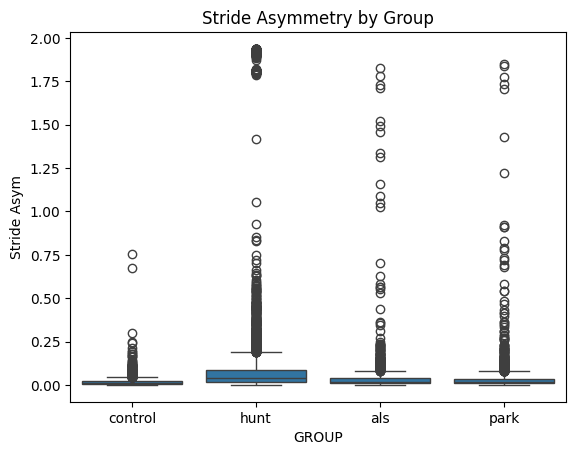

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='GROUP', y='Stride Asym', data=df)
plt.title('Stride Asymmetry by Group')
plt.show()


In [166]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd


X = df.drop(columns=['GROUP', 'SubjectID', 'gender', 'Unnamed: 0'], errors='ignore')
X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(df['GROUP'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.3, random_state=42, stratify=y
)

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Helps reduce overfitting
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7155 - loss: 0.7602 - val_accuracy: 0.9976 - val_loss: 0.0180
Epoch 2/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9954 - loss: 0.0288 - val_accuracy: 0.9991 - val_loss: 0.0067
Epoch 3/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9985 - loss: 0.0215 - val_accuracy: 0.9991 - val_loss: 0.0068
Epoch 4/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9979 - loss: 0.0145 - val_accuracy: 0.9995 - val_loss: 0.0035
Epoch 5/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9986 - loss: 0.0093 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 6/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 8/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.

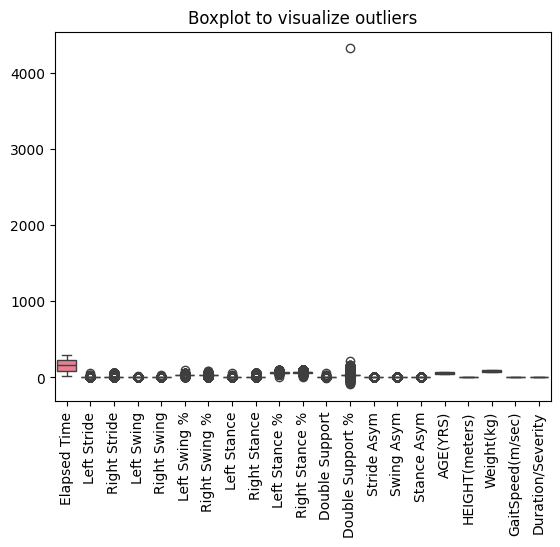

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot to visualize outliers")
plt.show()


In [169]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X = df.drop(columns=['GROUP', 'SubjectID', 'gender', 'Unnamed: 0'], errors='ignore')
X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(df['GROUP'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42, stratify=y
)




In [170]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train_cnn[:,:,0], y_train_cnn)
svm_preds = svm.predict(X_test_cnn[:,:,0])

print("\nSVM Accuracy:", accuracy_score(y_test_cnn, svm_preds))



SVM Accuracy: 0.9990105540897097


In [171]:


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_cnn[:,:,0], y_train_cnn)
rf_preds = rf.predict(X_test_cnn[:,:,0])

print("\nRandom Forest Accuracy:", accuracy_score(y_test_cnn, rf_preds))


Random Forest Accuracy: 1.0


In [123]:
rf_preds

array([3, 3, 3, ..., 1, 1, 2])

In [172]:
pip install lime

In [193]:
print("True labels in y_test:")
print(pd.Series(y_test_cnn).value_counts())




True labels in y_test:
2    969
1    815
3    738
0    510
Name: count, dtype: int64


In [206]:
import numpy as np
import pandas as pd

y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

print("Unique predicted classes:", np.unique(y_pred_labels))

print("Prediction distribution:\n", pd.Series(y_pred_labels).value_counts())

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Unique predicted classes: [0 1 2 3]
Prediction distribution:
 2    969
1    815
3    740
0    508
Name: count, dtype: int64


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


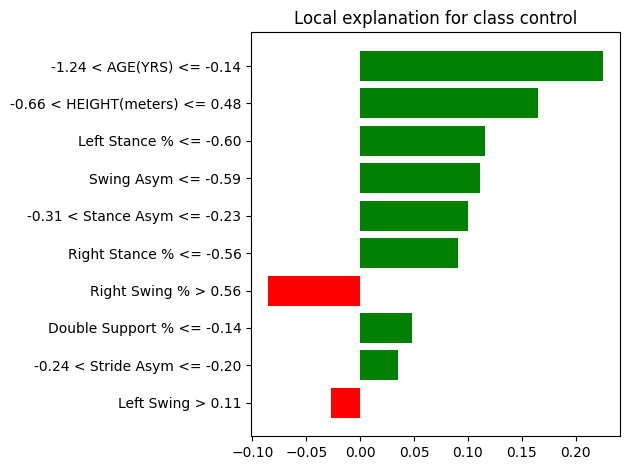

In [173]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf # Import tensorflow



X = df.drop(columns=['GROUP', 'SubjectID', 'gender', 'Unnamed: 0'])
X = pd.get_dummies(X)
y = LabelEncoder().fit_transform(df['GROUP'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_features = X_scaled.shape[1]
X_cnn = X_scaled.reshape((X_scaled.shape[0], num_features, 1))


X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
le = LabelEncoder()
y_encoded = le.fit_transform(df['GROUP'])



X_train_2D, X_test_2D, y_train_lime, y_test_lime = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, shuffle=True, stratify=y_encoded
)


def predict_fn(input_array):

    num_features_2d = input_array.shape[1]
    reshaped_input = input_array.reshape((input_array.shape[0], num_features_2d, 1))
    return model.predict(reshaped_input)



explainer = LimeTabularExplainer(
    X_train_2D,
    feature_names=X.columns.tolist(),
    class_names=le.classes_.tolist(),
    discretize_continuous=True
)


exp = explainer.explain_instance(X_test_2D[i], predict_fn, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

In [174]:
from google.colab import files
files.download("/content/combined_gait_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=193cf3f62f7b48aa947c2157247342dbd1317d78e7c406e79770dd0c41940f1e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
